In [ ]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U codeium-jupyter

In [83]:
import os
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     train_test_split)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (LabelEncoder, MinMaxScaler, OneHotEncoder,
                                   OrdinalEncoder)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [3]:
heart_disease_df = pd.read_csv('./heart_2022.csv')

In [4]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
print(heart_disease_df.duplicated().sum())

9


In [6]:
heart_disease_df = heart_disease_df.drop_duplicates()

In [7]:
heart_disease_df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [8]:
types_of_states =  heart_disease_df['State'].unique()
print(types_of_states)
print(len(types_of_states))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
54


In [9]:
heart_disease_df['State'].value_counts()

State
Washington              14998
Maryland                 9163
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5461
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4844
South Dakota             4404
Montana                  4264
Missouri                 4195
New Jersey               3966
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
Alaska                   3205
Rhod

In [10]:
heart_disease_df.iloc[1]

State                                                                  Alabama
Sex                                                                       Male
GeneralHealth                                                        Very good
PhysicalHealthDays                                                         0.0
MentalHealthDays                                                           0.0
LastCheckupTime              Within past year (anytime less than 12 months ...
PhysicalActivities                                                         Yes
SleepHours                                                                 6.0
RemovedTeeth                                                      None of them
HadHeartAttack                                                              No
HadAngina                                                                   No
HadStroke                                                                   No
HadAsthma                                           

In [11]:
def get_value_counts(df):
    object_columns = df.select_dtypes(include=['object'])

    value_counts_dict = {col: df[col].value_counts() for col in object_columns}

    for col, counts in value_counts_dict.items():
        print(f"Value counts for column '{col}':")
        print(counts)
        print("\n" + "-"*50 + "\n")


In [12]:
get_value_counts(heart_disease_df)

Value counts for column 'State':
State
Washington              14998
Maryland                 9163
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5461
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4844
South Dakota             4404
Montana                  4264
Missouri                 4195
New Jersey               3966
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
A

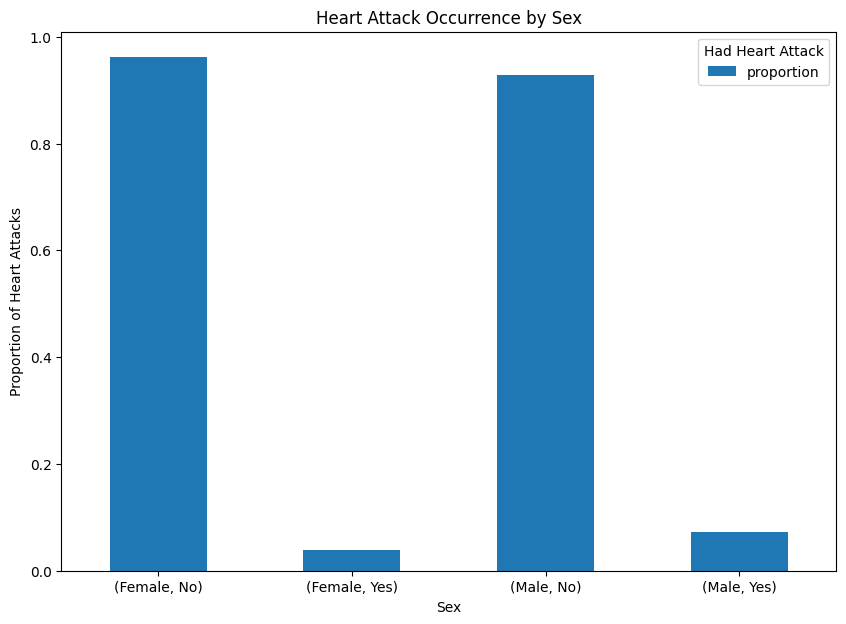

In [13]:
plot_data = heart_disease_df.groupby('Sex')['HadHeartAttack'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(10, 7))

plot_data.plot(kind='bar', ax=ax)

ax.set_xlabel('Sex')
ax.set_ylabel('Proportion of Heart Attacks')
ax.set_title('Heart Attack Occurrence by Sex')
ax.legend(title='Had Heart Attack', loc='upper right')

plt.xticks(rotation=0)
plt.show()

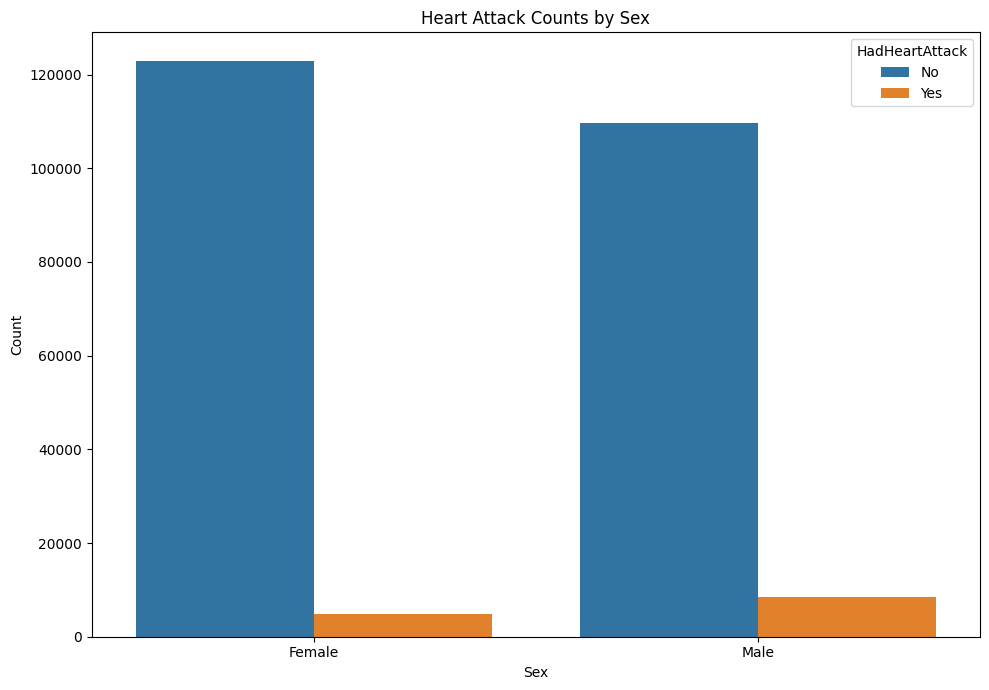

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=heart_disease_df, x='Sex', hue='HadHeartAttack', ax=ax)

# Set labels and title
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Heart Attack Counts by Sex')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

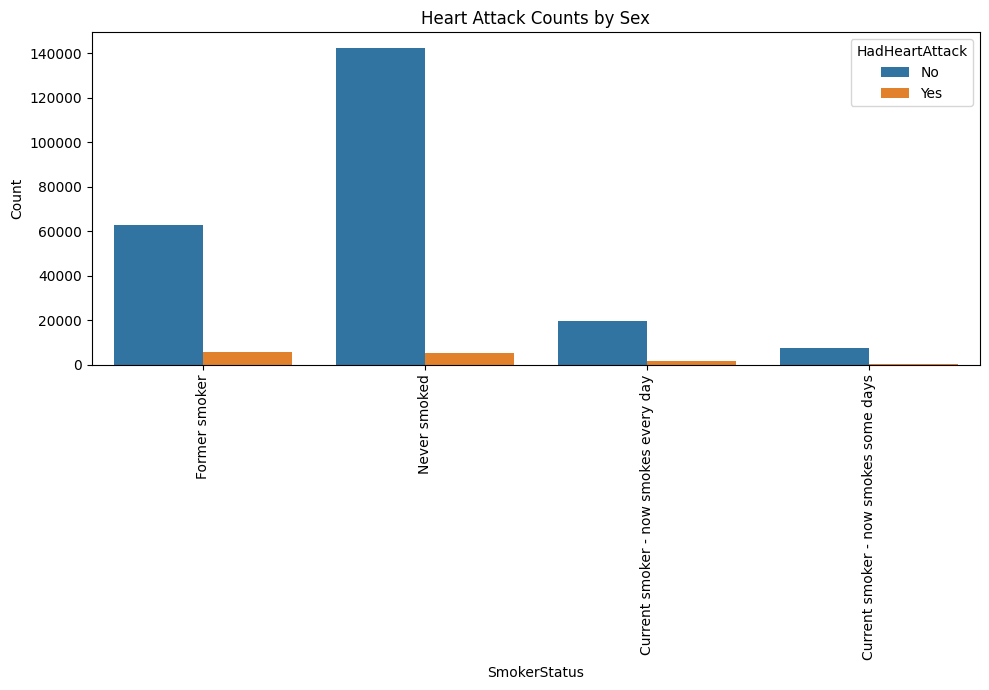

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=heart_disease_df, x='SmokerStatus', hue='HadHeartAttack', ax=ax)

# Set labels and title
ax.set_xlabel('SmokerStatus')
ax.set_ylabel('Count')
ax.set_title('Heart Attack Counts by Sex')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

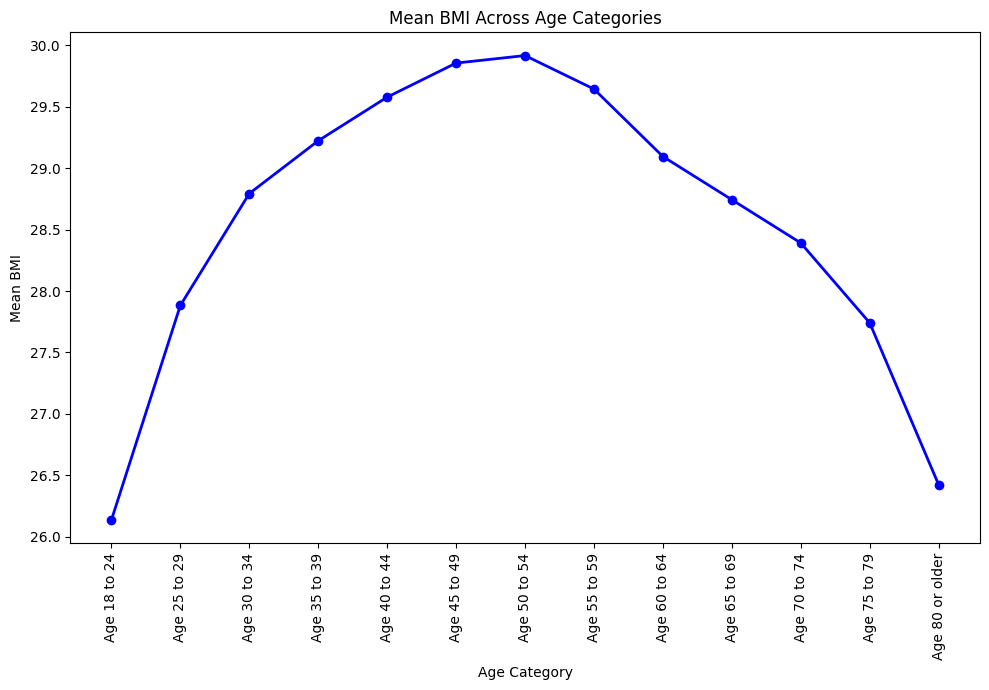

In [16]:
plot_data = heart_disease_df.groupby('AgeCategory')['BMI'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(plot_data['AgeCategory'], plot_data['BMI'], marker='o', linestyle='-', linewidth=2.0, color='b')

ax.set_xlabel('Age Category')
ax.set_ylabel('Mean BMI')
ax.set_title('Mean BMI Across Age Categories')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [17]:
plot_data = heart_disease_df.groupby('CovidPos')['HadHeartAttack'].value_counts().reset_index()
plot_data


,CovidPos,HadHeartAttack,count
0,No,No,157521
1,No,Yes,9776
2,Tested positive using home test without a heal...,No,8158
3,Tested positive using home test without a heal...,Yes,234
4,Yes,No,66899
5,Yes,Yes,3425


In [18]:

plot_data = heart_disease_df.groupby('HadDiabetes')['AgeCategory'].value_counts().reset_index()
plot_data


,HadDiabetes,AgeCategory,count
0,No,Age 65 to 69,21961
1,No,Age 60 to 64,21164
2,No,Age 70 to 74,19340
3,No,Age 55 to 59,17870
4,No,Age 50 to 54,16648
5,No,Age 40 to 44,15283
6,No,Age 45 to 49,14498
7,No,Age 35 to 39,14444
8,No,Age 80 or older,13945
9,No,Age 75 to 79,13525


# data cleaning

In [19]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  HadAngina                  246013 non-null  object 
 11  HadStroke                  246013 non-null  object 
 12  HadAsthma                  246013 non-null  object 
 13  HadSkinCancer              246013 

In [20]:
heart_disease_df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [21]:
heart_disease_df = heart_disease_df.drop('State',axis=1)

In [22]:
heart_disease_df.iloc[1]

Sex                                                                       Male
GeneralHealth                                                        Very good
PhysicalHealthDays                                                         0.0
MentalHealthDays                                                           0.0
LastCheckupTime              Within past year (anytime less than 12 months ...
PhysicalActivities                                                         Yes
SleepHours                                                                 6.0
RemovedTeeth                                                      None of them
HadHeartAttack                                                              No
HadAngina                                                                   No
HadStroke                                                                   No
HadAsthma                                                                   No
HadSkinCancer                                       

In [23]:
heart_disease_df.head(3)

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [24]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers

In [25]:
def box_plot(column):    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, color='purple')
    plt.title('Outlier Analysis in BMI')
    plt.xlabel('BMI')
    plt.show()

In [26]:
df_no_outliers_1 = remove_outliers_iqr(heart_disease_df, 'BMI')

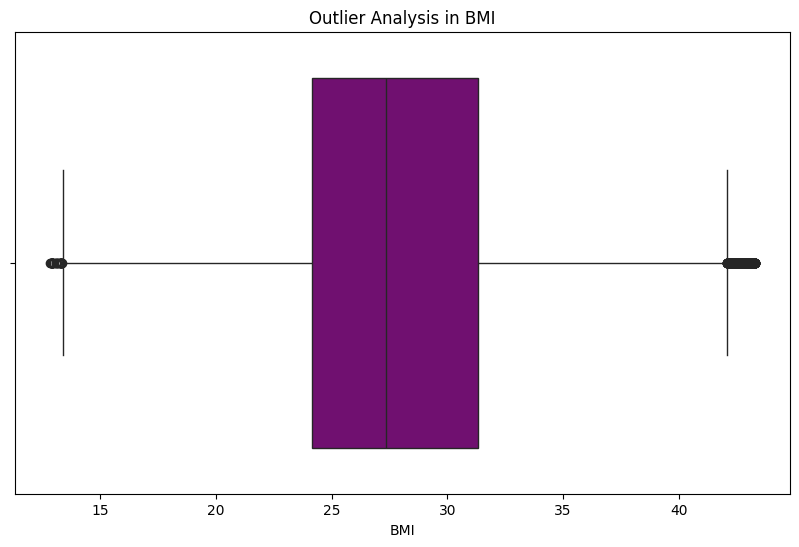

In [27]:
box_plot(df_no_outliers_1['BMI'])

In [28]:
df_no_outliers_2 = remove_outliers_iqr(df_no_outliers_1, 'HeightInMeters')

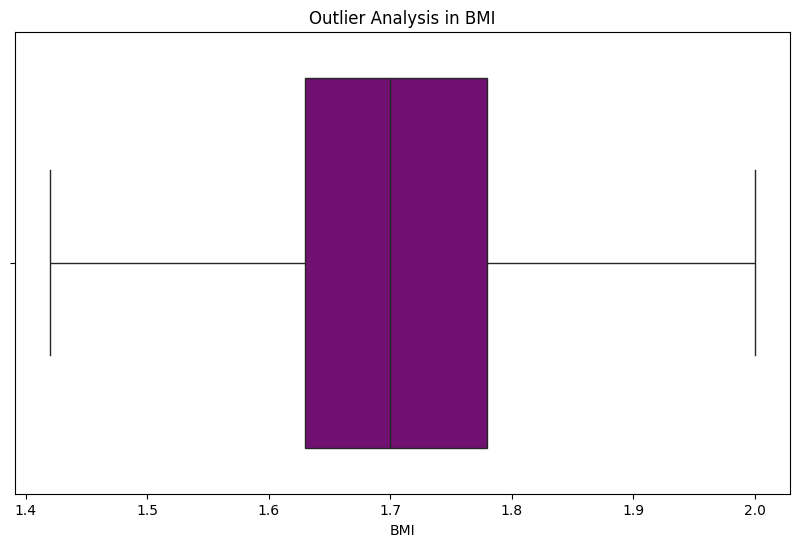

In [29]:
box_plot(df_no_outliers_2['HeightInMeters'])

In [30]:
df_no_outliers_3 = remove_outliers_iqr(df_no_outliers_2, 'SleepHours')


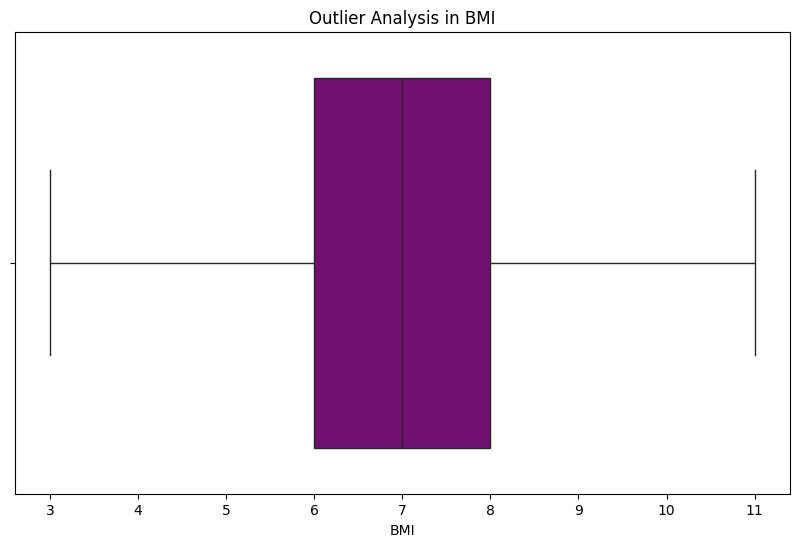

In [31]:
box_plot(df_no_outliers_3['SleepHours'])

In [32]:
df_no_outliers_4 = remove_outliers_iqr(df_no_outliers_3, 'WeightInKilograms')


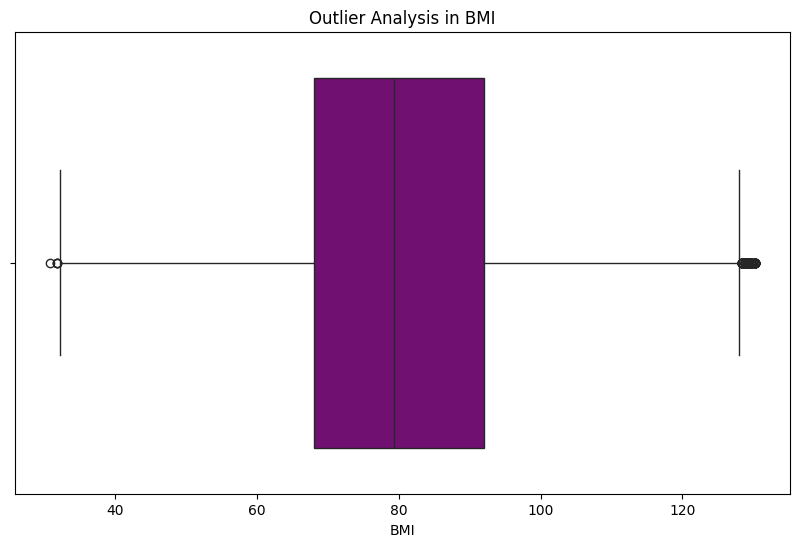

In [33]:
box_plot(df_no_outliers_4['WeightInKilograms'])


# data preprocessing

In [34]:
get_value_counts(df_no_outliers_4)

Value counts for column 'Sex':
Sex
Female    120721
Male      110563
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'GeneralHealth':
GeneralHealth
Very good    84118
Good         71888
Excellent    40579
Fair         26865
Poor          7834
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'LastCheckupTime':
LastCheckupTime
Within past year (anytime less than 12 months ago)         185902
Within past 2 years (1 year but less than 2 years ago)      22079
Within past 5 years (2 years but less than 5 years ago)     12981
5 or more years ago                                         10322
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'PhysicalActivities':
PhysicalActivities
Yes    182451
No      48833
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'RemovedTeeth':
RemovedTe

In [35]:
df_no_outliers_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231284 entries, 0 to 246021
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        231284 non-null  object 
 1   GeneralHealth              231284 non-null  object 
 2   PhysicalHealthDays         231284 non-null  float64
 3   MentalHealthDays           231284 non-null  float64
 4   LastCheckupTime            231284 non-null  object 
 5   PhysicalActivities         231284 non-null  object 
 6   SleepHours                 231284 non-null  float64
 7   RemovedTeeth               231284 non-null  object 
 8   HadHeartAttack             231284 non-null  object 
 9   HadAngina                  231284 non-null  object 
 10  HadStroke                  231284 non-null  object 
 11  HadAsthma                  231284 non-null  object 
 12  HadSkinCancer              231284 non-null  object 
 13  HadCOPD                    231284 

In [35]:
heart_disease_df['HadHeartAttack'].value_counts()

HadHeartAttack
No     232578
Yes     13435
Name: count, dtype: int64

In [34]:
df_no_outliers_4['HadHeartAttack'].value_counts()

HadHeartAttack
No     218968
Yes     12316
Name: count, dtype: int64

In [ ]:
X = df_no_outliers_4.drop('HadHeartAttack',axis=1)
y = df_no_outliers_4['HadHeartAttack']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X

In [ ]:
def transforme_random(df:pd.DataFrame):
    np.random.seed(42)
    X = df.drop('HadHeartAttack',axis=1)
    y = df['HadHeartAttack']
    two_category_features = ['Sex', 'PhysicalActivities', 'HadAngina', 'HadStroke',
                            'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                            'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
                            'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
                            'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
                            'PneumoVaxEver', 'HighRiskLastYear']

    categorical_features = ['CovidPos', 'TetanusLast10Tdap', 'AgeCategory', 'RaceEthnicityCategory', 'ECigaretteUsage',
                            'SmokerStatus', 'HadDiabetes', 'RemovedTeeth', 'LastCheckupTime', 'GeneralHealth']

    numeric_features = ['PhysicalHealthDays', 'MentalHealthDays',
                        'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

    two_category_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    numeric_transformer = Pipeline(steps=[
        ('minmax',MinMaxScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('two_cat', two_category_transformer, two_category_features),
        ('cat', categorical_transformer, categorical_features),
        ('minmax', numeric_transformer,numeric_features)
    ],
        remainder='passthrough'
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Adding oversampling step into the pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('sampler', RandomOverSampler(random_state=42))
    ])
    
    # Transform and oversample the training data
    X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)
    
    # Transform the test set (no oversampling applied here)
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
    
    print("Resampled training set shape:", X_train_resampled.shape, Counter(y_train_resampled))
    print("Transformed test set shape:", X_test_transformed.shape, Counter(y_test))

    return X_train_resampled, X_test_transformed, y_train_resampled, y_test

In [79]:
def transforme(df:pd.DataFrame):
    np.random.seed(42)
    X = df.drop('HadHeartAttack',axis=1)
    y = df['HadHeartAttack']
    two_category_features = ['Sex', 'PhysicalActivities', 'HadAngina', 'HadStroke',
                            'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                            'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
                            'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
                            'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
                            'PneumoVaxEver', 'HighRiskLastYear']

    categorical_features = ['CovidPos', 'TetanusLast10Tdap', 'AgeCategory', 'RaceEthnicityCategory', 'ECigaretteUsage',
                            'SmokerStatus', 'HadDiabetes', 'RemovedTeeth', 'LastCheckupTime', 'GeneralHealth']

    numeric_features = ['PhysicalHealthDays', 'MentalHealthDays',
                        'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

    two_category_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    numeric_transformer = Pipeline(steps=[
        ('minmax',MinMaxScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('two_cat', two_category_transformer, two_category_features),
        ('cat', categorical_transformer, categorical_features),
        ('minmax', numeric_transformer,numeric_features)
    ],
        remainder='passthrough'
    )

    transformed_X = preprocessor.fit_transform(X)

    # Check the result
    print(transformed_X)
    return transformed_X, y

In [ ]:
def get_transformed_columns_with_remainder(preprocessor,original_df):
    transformed_columns = []

    for name, transformer, columns in preprocessor.transformers_:
        if name == 'remainder':
            passthrough_columns = original_df.columns[columns]
            transformed_columns.extend(passthrough_columns)
            continue

        if hasattr(transformer, 'steps'):
            transformer = transformer.steps[-1][1]

        if hasattr(transformer, 'get_feature_names_out'):
            feature_names = transformer.get_feature_names_out(columns)
            transformed_columns.extend(feature_names)
        else:
            transformed_columns.extend(columns)
    
    return transformed_columns

transformed_columns = get_transformed_columns_with_remainder(preprocessor,X)

transformed_df = pd.DataFrame(transformed_X.toarray() if hasattr(transformed_X, 'toarray') else transformed_X, 
                              columns=transformed_columns)

print(transformed_df.head(1))


# Model_1

In [80]:
X_train_resampled, X_test_transformed, y_train_resampled, y_test = transforme(heart_disease_df)

Resampled training set shape: (372124, 78) Counter({'No': 186062, 'Yes': 186062})
Transformed test set shape: (49203, 78) Counter({'No': 46516, 'Yes': 2687})


In [66]:
def evaluate_preds(y_true, y_preds,model):
    # Convert 'Yes'/'No' to 1/0
    y_true_binary = [1 if label == 'Yes' else 0 for label in y_true]
    y_preds_binary = [1 if label == 'Yes' else 0 for label in y_preds]
    
    # Compute metrics
    accuracy = accuracy_score(y_true_binary, y_preds_binary)
    precision = precision_score(y_true_binary, y_preds_binary)
    recall = recall_score(y_true_binary, y_preds_binary)
    f1 = f1_score(y_true_binary, y_preds_binary)
    
    metric_dict = {
        "model":model,
        "accuracy_score": accuracy,
        "precision_score": precision,
        "recall_score": recall,
        "f1_score": f1
    }
    
    print(f'Accuracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision*100:.2f}%')
    print(f'Recall: {recall*100:.2f}%')
    print(f'F1 Score: {f1*100:.2f}%')
    metric_df = pd.DataFrame([metric_dict])
    
    file_path = './heart_detection_accuracy/accuracy.csv'
    
    if not os.path.isfile(file_path):
        metric_df.to_csv(file_path, index=False)
    else:
        metric_df.to_csv(file_path, mode='a', header=False, index=False)
    return metric_dict

In [67]:
y_test.value_counts()

HadHeartAttack
Yes    46533
No     46499
Name: count, dtype: int64

In [81]:
np.random.seed(42)
model_1 = RandomForestClassifier(class_weight='balanced')
model_1.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(class_weight='balanced')

In [82]:
y_preds = model_1.predict(X_test_transformed)

baseline_metrics = evaluate_preds(y_test,y_preds,'model_6')


Accuracy: 94.77%
Precision: 54.55%
Recall: 25.68%
F1 Score: 34.92%


#  Model_2

In [ ]:
transformed_X, y = transforme(df_no_outliers_4)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [ ]:
np.random.seed(42)
model_2 = RandomForestClassifier()
model_2.fit(X_train,y_train)

In [ ]:
y_preds_2 = model_2.predict(X_test)

model_2_metrics = evaluate_preds(y_test,y_preds_2,'model_2')


# Model_3

In [ ]:
transformed_X, y = transforme(df_no_outliers_4)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [ ]:
np.random.seed(42)
model_3 = RandomForestClassifier()
model_3.fit(X_train,y_train)

In [ ]:
y_preds_3 = model_3.predict(X_test)

model_3_metrics = evaluate_preds(y_test,y_preds_3,'model_3')


# Model_4

In [37]:
grid_1 = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ['auto', 'sqrt'],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

In [38]:
transformed_X, y = transforme(df_no_outliers_4)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

[[0.         1.         0.         ... 0.31034483 0.41101268 0.49770039]
 [1.         1.         0.         ... 0.62068966 0.6483793  0.56800263]
 [1.         0.         0.         ... 0.74137931 0.78538353 0.61826544]
 ...
 [1.         1.         0.         ... 0.44827586 0.53422589 0.55913272]
 [0.         1.         0.         ... 0.48275862 0.5251661  0.51971091]
 [1.         0.         0.         ... 0.70689655 0.78538353 0.64750329]]


In [39]:
np.random.seed(42)


clf = RandomForestClassifier(n_jobs=1)

model_4 = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid_1,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2 
                            )
model_4.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  46.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  44.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

f:\ml\course\sample_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "f:\ml\course\sample_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\ml\course\sample_project\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "f:\ml\course\sample_project\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "f:\ml\cours

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [40]:
model_4.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [43]:
y_preds_4 = model_4.predict(X_test)

model_4_metrics = evaluate_preds(y_test,y_preds_4,'model_4')


Accuracy: 94.95%
Precision: 61.62%
Recall: 11.52%
F1 Score: 19.41%
